 ## 模型误差
 
 ### 模型误差=偏差Bias + 方差Variance + 不可避免的误差
 
 ### 偏差Bias：对问题本身的假设不正确，例如：使用线性模型去拟合非线性数据，欠拟合
 
 ### 方差Variance：数据的一点点扰动，都会较大地影响模型。通常原因，模型太复杂，过拟合。例如：使用高阶多项式回归。
 
 ### kNN算法，决策树，高方差。非参数学习算法通常都是高方差算法，不对数据进行任何假设。
 
 ### 线性回归，高偏差。参数学习算法通常都是高偏差算法，使用数学模型，就需要假设，对数据有较强的假设。
 
 ### 偏差和方差通常是矛盾的。
 
 ## 机器学习的主要挑战，来自于方差
 
 ### 解决高方差的通常手段：
 1. 降低模型复杂度
 2. 减少数据维度，降噪
 3. 增加样本数
 4. 使用验证集
 5. 模型正则化

# 模型正则化

## 限制参数的大小

## 训练模型，初始的目的是，训练误差尽量的小。如果单纯的使得这个误差尽可能小，那么， 就可以使用高阶多项式，它却会导致模型过拟合。而模型过拟合的一种表现是，模型的参数值非常大。
## 因此，就产生了模型正则化。它的目的就是，限制模型参数的取值。把模型参数也作为最小化的目标函数中。

## 模型正则化的代表：岭回归Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x=np.random.uniform(-3.0, 3.0, size=100)
X=x.reshape(-1,1)
# 线性关系，增加一点噪音
y= 0.5*x + 3.0 + np.random.normal(0.0, 1.0, size=100)

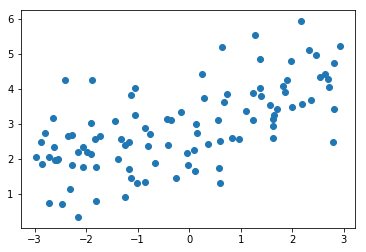

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(666)

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [7]:
X_train.shape

(75, 1)

In [8]:
X_test.shape

(25, 1)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
poly_reg20=PolynomialRegression(20)
poly_reg20.fit(X_train, y_train)

y_test_predict20=poly_reg20.predict(X_test)

mean_squared_error(y_test, y_test_predict20)

167.94010860007324

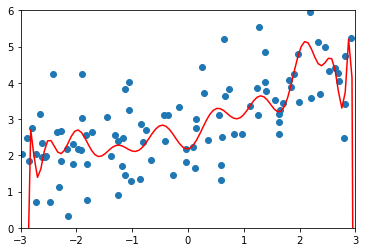

In [12]:
X_plot=np.linspace(-3.0, 3.0, 100).reshape(-1,1)
y_plot=poly_reg20.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3.0, 3.0, 0, 6])
plt.show()

In [19]:
def plot_model(model):
    X_plot=np.linspace(-3.0, 3.0, 100).reshape(-1,1)
    y_plot=model.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3.0, 3.0, 0, 6])
    plt.show()

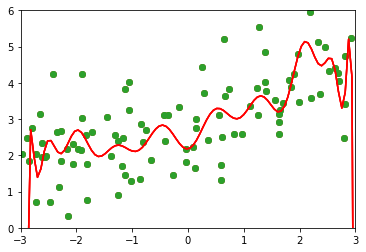

In [20]:
plot_model(poly_reg20)

## 岭回归

In [21]:
from sklearn.linear_model import Ridge

In [22]:
"""
alpha是惩罚程度
"""
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

In [23]:
ridge_reg0001=RidgeRegression(20, 0.0001)

ridge_reg0001.fit(X_train, y_train)
y_test_predict0001 = ridge_reg0001.predict(X_test)
mean_squared_error(y_test, y_test_predict0001)

1.3233492754033298

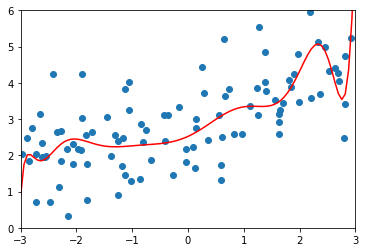

In [24]:
plot_model(ridge_reg0001)

In [25]:
ridge_reg1=RidgeRegression(20, 1.0)
ridge_reg1.fit(X_train, y_train)
y_test_predict1 = ridge_reg1.predict(X_test)
mean_squared_error(y_test, y_test_predict1)

1.1888759304218453

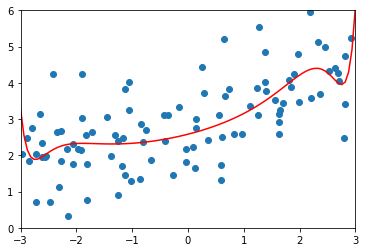

In [26]:
plot_model(ridge_reg1)

In [27]:
ridge_reg100=RidgeRegression(20, 100)
ridge_reg100.fit(X_train, y_train)
y_test_predict100=ridge_reg100.predict(X_test)
mean_squared_error(y_test, y_test_predict100)

1.3196456113086197

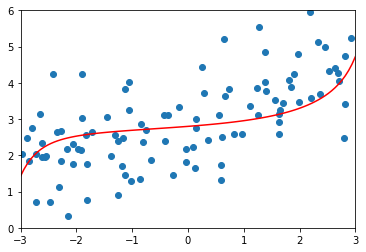

In [28]:
plot_model(ridge_reg100)

In [29]:
ridge_reg10000 = RidgeRegression(20, 10000)
ridge_reg10000.fit(X_train, y_train)
y_test_predict10000=ridge_reg10000.predict(X_test)
mean_squared_error(y_test, y_test_predict10000)

1.7967435583383999

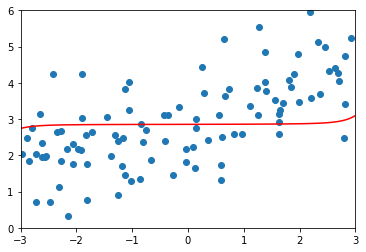

In [30]:
plot_model(ridge_reg10000)